# Nonlinear Regression to estimate nonlinearity in genotype-phenotype maps

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from gpmap import GenotypePhenotypeMap
from epistasis.models import EpistasisPowerTransform

In [18]:
gpm = GenotypePhenotypeMap.read_json("../data/nonlinear-epistasis-dataset.json")

In [24]:
# Initialize the model
model = EpistasisPowerTransform(lmbda=2, A=1, B=1)
model.add_gpm(gpm)

# Fit the model.
x = model.fit()

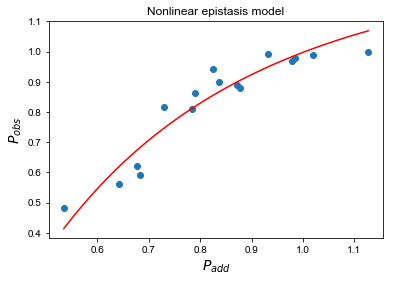

In [26]:
padd = model.Additive.predict()
pobs = model.gpm.phenotypes
plt.plot(padd, pobs, "o")

xmodel = np.linspace(min(padd), max(padd))
ymodel = model.function(xmodel, **model.parameters, data=padd)

plt.plot(xmodel, ymodel, "-r")
plt.xlabel("$P_{add}$", fontsize=14)
plt.ylabel("$P_{obs}$", fontsize=14)
plt.title("Nonlinear epistasis model")
plt.show()